<a href="https://colab.research.google.com/github/amitanshupanigrahi2704/EDA-/blob/main/21BDS0244.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis
Reg No. 21BDS0244

Name: Amitanshu Panigrahi
# BCSE331L Digital Assignment 1

In [4]:
# Reg. No: 21BDS0244    Name: Amitanshu Panigrahi
# Dataset: https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv

# MODULE 1

# importing necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(data_url)

# displaying the first five rows of the dataset
print("Head of the Dataset:")
print(df.head())

# Dimensions of the dataset
print("\nDataset Dimensions:")
print(df.shape)

# Summary of the Dataset
print("\nSummary:")
print(df.describe())

# missing values
print("\nMissing values:")
print(df.isnull().sum())

# Data types present in given dataset
print("\nData types:")
print(df.dtypes)



Head of the Dataset:
   age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0   27      M      172.3      75.24        21.3       80.0     130.0   
1   25      M      165.0      55.80        15.7       77.0     126.0   
2   31      M      179.6      78.00        20.1       92.0     152.0   
3   32      M      174.5      71.10        18.4       76.0     147.0   
4   28      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B  

Dataset Dimensions:
(13393, 12)

Summary:
                age     height_cm     wei

In [9]:
# MODULE 2

# Data Transformation: Merging, Concatenation, Joins

# adding a new column based on other attributes (eg. bmi)
df['BMI'] = df['weight_kg'] / (df['height_cm'] / 100) ** 2
print("\nBMI column created:")
print(df[['height_cm', 'weight_kg', 'BMI']].head())

# splitting dataset into two
dp1 = df.iloc[:len(df)//2]
dp2 = df.iloc[len(df)//2:]

# merging based on a common column (age)
mdata = pd.merge(dp1, dp2, on='age', how='inner', suffixes=('_dp1', '_dp2'))
print("\nmerged dataframe (inner join):")
print(mdata.head())

# concatenation along rows
cdatarow = pd.concat([dp1, dp2], axis=0)
print("\nconcatenated dataframe (rows):")
print(cdatarow.head())

# concatenation along columns
cdatacol = pd.concat([dp1.reset_index(drop=True), dp2.reset_index(drop=True)], axis=1)
print("\nconcatenated dataframe (columns):")
print(cdatacol.head())

# outer join
outer_data = pd.merge(dp1, dp2, on='age', how='outer', suffixes=('_dp1', '_dp2'))
print("\nouter join dataframe:")
print(outer_data.head())

# left join
left_data = pd.merge(dp1, dp2, on='age', how='left', suffixes=('_dp1', '_dp2'))
print("\nleft join dataframe:")
print(left_data.head())

# right join
right_data = pd.merge(dp1, dp2, on='age', how='right', suffixes=('_dp1', '_dp2'))
print("\nright join dataframe:")
print(right_data.head())

# stack and unstack operations
stacked = df.stack()
unstacked = stacked.unstack()
print("\nstacked dataframe:")
print(stacked.head())
print("\nunstacked dataframe:")
print(unstacked.head())

# checking for duplicates
duplicates = df[df.duplicated()]
print("\nduplicated rows:")
print(duplicates)

# drop duplicates
df_nodup = df.drop_duplicates()
print("\ndataframe after dropping duplicates:")
print(df_nodup.shape)


# handling missing values
# forward fill
df_ffill = df.fillna(method='ffill')
print("\nmissing values handled using forward fill:")
print(df_ffill.isnull().sum())

# backward fill
df_bfill = df.fillna(method='bfill')
print("\nmissing values handled using backward fill:")
print(df_bfill.isnull().sum())

# replace with mean
df_mean = df.fillna(df.mean(numeric_only=True))
print("\nmissing values handled by replacing with mean:")
print(df_mean.isnull().sum())

# replace with cumulative sum only for numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns
df_cumsum = df.copy()  # create a copy to avoid modifying the original dataframe
df_cumsum[numeric_columns] = df_cumsum[numeric_columns].fillna(df_cumsum[numeric_columns].cumsum())
print("\nmissing values in numeric columns handled using cumulative sum:")
print(df_cumsum.isnull().sum())

# drop rows with missing values
df_droprows = df.dropna()
print("\ndataframe after dropping rows with missing values:")
print(df_droprows.isnull().sum())

# drop columns with missing values
df_dropcols = df.dropna(axis=1)
print("\ndataframe after dropping columns with missing values:")
print(df_dropcols.isnull().sum())


BMI column created:
   height_cm  weight_kg        BMI
0      172.3      75.24  25.344179
1      165.0      55.80  20.495868
2      179.6      78.00  24.181428
3      174.5      71.10  23.349562
4      173.8      67.70  22.412439

merged dataframe (inner join):
   age gender_dp1  height_cm_dp1  weight_kg_dp1  body fat_%_dp1  \
0   27          M          172.3          75.24            21.3   
1   27          M          172.3          75.24            21.3   
2   27          M          172.3          75.24            21.3   
3   27          M          172.3          75.24            21.3   
4   27          M          172.3          75.24            21.3   

   diastolic_dp1  systolic_dp1  gripForce_dp1  sit and bend forward_cm_dp1  \
0           80.0         130.0           54.9                         18.4   
1           80.0         130.0           54.9                         18.4   
2           80.0         130.0           54.9                         18.4   
3           80.0      

<ipython-input-9-a8e5c4fa9144>:65: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
<ipython-input-9-a8e5c4fa9144>:70: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')



BMI categories created:
         BMI   BMI_category
0  25.344179     overweight
1  20.495868  normal weight
2  24.181428  normal weight
3  23.349562  normal weight
4  22.412439  normal weight


<ipython-input-7-103dc90307e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['BMI_category'], palette='magma')


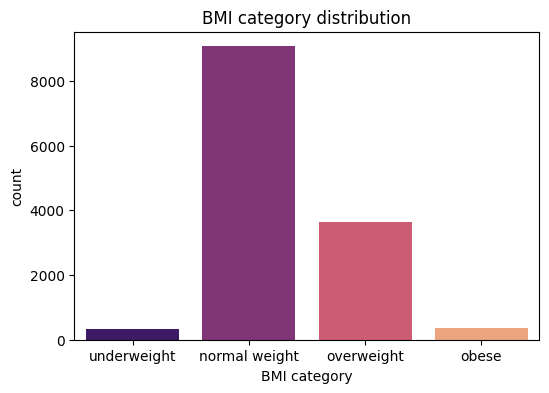

In [7]:
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['underweight', 'normal weight', 'overweight', 'obese']
df['BMI_category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)
print("\nBMI categories created:")
print(df[['BMI', 'BMI_category']].head())

plt.figure(figsize=(6, 4))
sns.countplot(x=df['BMI_category'], palette='magma')
plt.title('BMI category distribution')
plt.xlabel('BMI category')
plt.ylabel('count')
plt.show()

<ipython-input-8-5d76de90ca4a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['BMI'], palette='Set2')


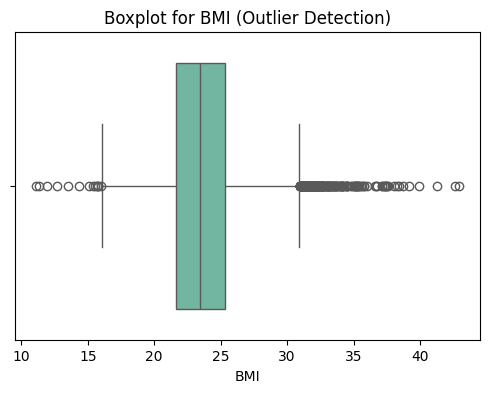


DataFrame after filtering outliers in BMI:
(13167, 14)


In [8]:
# outlier detection and filtering (eg. for 'BMI')
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['BMI'], palette='Set2')
plt.title('Boxplot for BMI (Outlier Detection)')
plt.xlabel('BMI')
plt.show()

# removing outliers based on IQR
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]
print("\nDataFrame after filtering outliers in BMI:")
print(filtered_df.shape)


Data Types of Each Column:
age                          int64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

descriptive statistics of the dataset:
                 age gender     height_cm     weight_kg    body fat_%  \
count   13393.000000  13392  13393.000000  13393.000000  13392.000000   
unique           NaN      2           NaN           NaN           NaN   
top              NaN      M           NaN           NaN           NaN   
freq             NaN   8466           NaN           NaN           NaN   
mean       36.775106    NaN    168.559807     67.447316     23.240258   
std        13.625639    NaN      8.426583     11.949666      

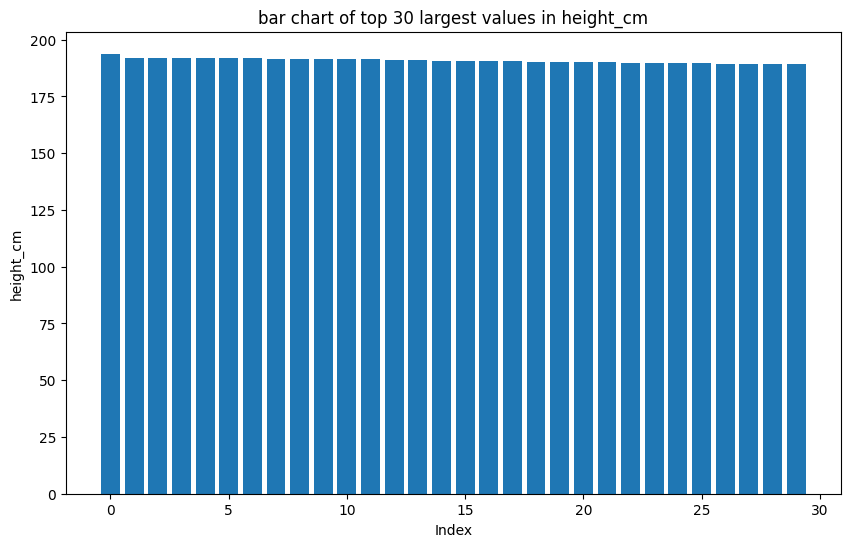

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


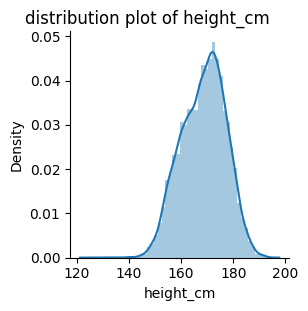

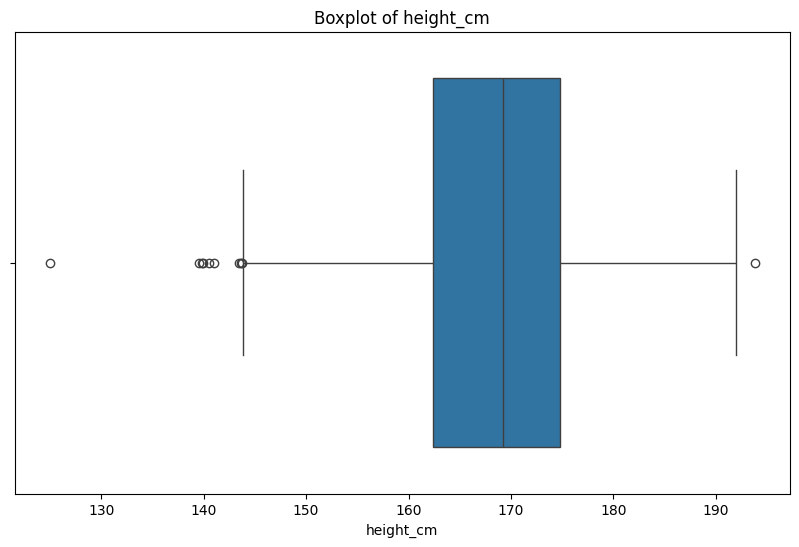

In [13]:
# MODULE 3

# Univariate analysis

# loading the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

# checking data types of each column
print("Data Types of Each Column:")
print(df.dtypes)

# calculating descriptive statistics of the entire dataset
print("\ndescriptive statistics of the dataset:")
print(df.describe(include='all'))

# finding the number of non-numeric values in each column
non_num_count = df.apply(lambda col: col.apply(lambda x: not str(x).replace('.', '', 1).isdigit()).sum())
print("\nnumber of non-numeric values in each column:")
print(non_num_count)

# listing non-numeric values in each column
non_num_vals = {
    col: df[col][df[col].apply(lambda x: not str(x).replace('.', '', 1).isdigit())].unique()
    for col in df.columns
}
print("\nlist of non-numeric values in each column:")
print(non_num_vals)

# converting non-numeric values to nan and filling missing values with the column mean
df_cleaned = df.apply(pd.to_numeric, errors='coerce')
df_cleaned.fillna(df_cleaned.mean(), inplace=True)

# computing measures of central tendency for 'height_cm'
col = 'height_cm'
mean = df_cleaned[col].mean()
median = df_cleaned[col].median()
mode = df_cleaned[col].mode()[0]

print(f"\nmeasures of central tendency for {col}:")
print(f"mean: {mean}, median: {median}, mode: {mode}")

# bar chart of the first 30 largest values in 'height_cm' column
top_30 = df_cleaned.nlargest(30, col)
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_30[col])), top_30[col])
plt.xlabel('Index')
plt.ylabel(col)
plt.title(f'bar chart of top 30 largest values in {col}')
plt.show()

# distribution plot for 'height_cm' columb
g = sns.FacetGrid(df).map(sns.distplot,"height_cm").add_legend()
g.set_axis_labels(col, 'Density')
g.fig.suptitle(f'distribution plot of {col}', y=1.02)
plt.show()

# boxplot for 'height_cm' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned[col])
plt.title(f'Boxplot of {col}')
plt.xlabel(col)
plt.show()


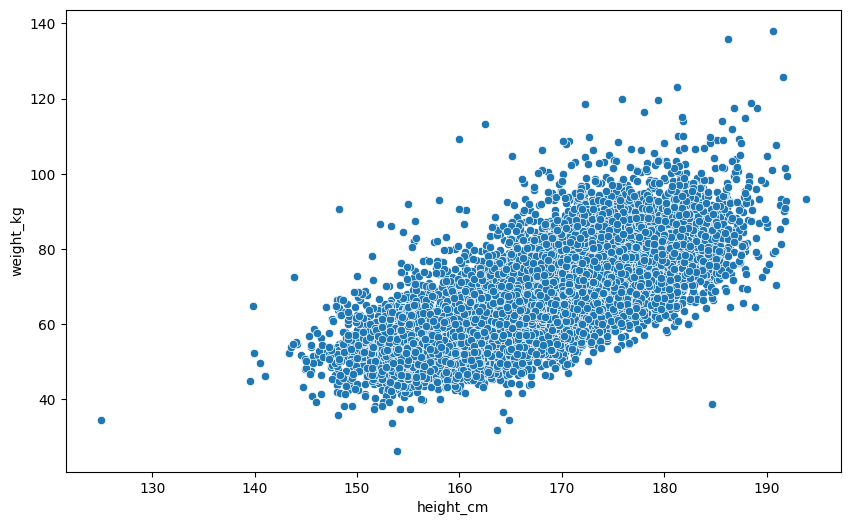

<Axes: xlabel='height_cm', ylabel='class'>

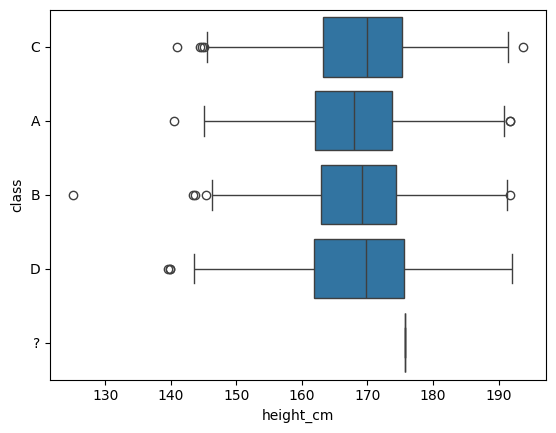

In [19]:
# Bivariate analysis

# scatterplot between 'height_cm' and 'weight_kg'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height_cm', y='weight_kg', data=df_cleaned)
plt.show()

# boxplot between 'height_cm' and 'weight_kg' grouped by class
sns.boxplot(x="height_cm", y="class",data=df)